In [144]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [145]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aaryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aaryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
df = pd.read_csv("C:/Users/Aaryan/Downloads/spam.csv", encoding = 'latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [147]:
df = df[['v1', 'v2']]

In [148]:
df.columns = ['label', 'text']

In [149]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
## Defining the stopwords

In [151]:
stop_words = set(stopwords.words('english'))

In [152]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

In [153]:
df['tokens'] = df['text'].apply(tokenize_and_remove_stopwords)

In [154]:
ham_tokens = df[df['label'] == 'ham']['tokens']
ham_words = [word for tokens in ham_tokens for word in tokens]
ham_word_freq = Counter(ham_words)
top_ham_words = ham_word_freq.most_common(10)

In [155]:
print("Top 10 words in 'ham' messages:")
for word, freq in top_ham_words:
    print(f"{word}: {freq}")

Top 10 words in 'ham' messages:
u: 989
gt: 318
lt: 316
get: 301
ok: 261
go: 248
got: 242
ur: 237
know: 236
like: 231


In [156]:
spam_tokens = df[df['label'] == 'spam']['tokens']
spam_words = [word for tokens in spam_tokens for word in tokens]
spam_word_freq = Counter(spam_words)
top_spam_words = spam_word_freq.most_common(10)

In [157]:
print("\nTop 10 words in 'spam' messages:")
for word, freq in top_spam_words:
    print(f"{word}: {freq}")


Top 10 words in 'spam' messages:
call: 346
free: 219
txt: 156
u: 144
ur: 144
mobile: 123
text: 121
stop: 114
claim: 113
reply: 104


In [158]:
## Finding the most frequent bigrams and trigrams

In [159]:
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

In [160]:
ham_bigrams = [bigram for tokens in ham_tokens for bigram in generate_ngrams(tokens, 2)]

ham_bigram_freq = Counter(ham_bigrams)

top_ham_bigrams = ham_bigram_freq.most_common(10)

print("Top 10 bi-grams in 'ham' messages:")
for bigram, freq in top_ham_bigrams:
    print(f"{bigram}: {freq}")

Top 10 bi-grams in 'ham' messages:
('lt', 'gt'): 276
('gon', 'na'): 58
('call', 'later'): 50
('let', 'know'): 39
('sorry', 'call'): 38
('r', 'u'): 37
('u', 'r'): 35
('good', 'morning'): 31
('take', 'care'): 31
('u', 'wan'): 29


In [161]:
ham_trigrams = [trigram for tokens in ham_tokens for trigram in generate_ngrams(tokens, 3)]

ham_trigram_freq = Counter(ham_trigrams)

top_ham_trigrams = ham_trigram_freq.most_common(10)

print("\nTop 10 tri-grams in 'ham' messages:")
for trigram, freq in top_ham_trigrams:
    print(f"{trigram}: {freq}")


Top 10 tri-grams in 'ham' messages:
('sorry', 'call', 'later'): 38
('lt', 'decimal', 'gt'): 23
('gt', 'lt', 'gt'): 18
('happy', 'new', 'year'): 18
('lt', 'gt', 'lt'): 16
('like', 'lt', 'gt'): 14
('pls', 'send', 'message'): 13
('cant', 'pick', 'phone'): 12
('pick', 'phone', 'right'): 12
('phone', 'right', 'pls'): 12


In [162]:
spam_bigrams = [bigram for tokens in spam_tokens for bigram in generate_ngrams(tokens, 2)]

spam_bigram_freq = Counter(spam_bigrams)

top_spam_bigrams = spam_bigram_freq.most_common(10)

print("\nTop 10 bi-grams in 'spam' messages:")
for bigram, freq in top_spam_bigrams:
    print(f"{bigram}: {freq}")


Top 10 bi-grams in 'spam' messages:
('please', 'call'): 45
('po', 'box'): 24
('guaranteed', 'call'): 23
('prize', 'guaranteed'): 22
('call', 'landline'): 22
('selected', 'receive'): 19
('contact', 'u'): 19
('send', 'stop'): 19
('every', 'week'): 19
('await', 'collection'): 19


In [163]:
spam_trigrams = [trigram for tokens in spam_tokens for trigram in generate_ngrams(tokens, 3)]

spam_trigram_freq = Counter(spam_trigrams)

top_spam_trigrams = spam_trigram_freq.most_common(10)

print("\nTop 10 tri-grams in 'spam' messages:")
for trigram, freq in top_spam_trigrams:
    print(f"{trigram}: {freq}")


Top 10 tri-grams in 'spam' messages:
('prize', 'guaranteed', 'call'): 21
('call', 'land', 'line'): 18
('private', 'account', 'statement'): 16
('call', 'identifier', 'code'): 15
('guaranteed', 'call', 'land'): 15
('identifier', 'code', 'expires'): 14
('land', 'line', 'claim'): 14
('draw', 'shows', 'prize'): 13
('shows', 'prize', 'guaranteed'): 13
('account', 'statement', 'shows'): 13


In [164]:
## Generating the wordclouds we need

In [165]:
def process_messages(messages):
    tokens = nltk.word_tokenize(messages)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens

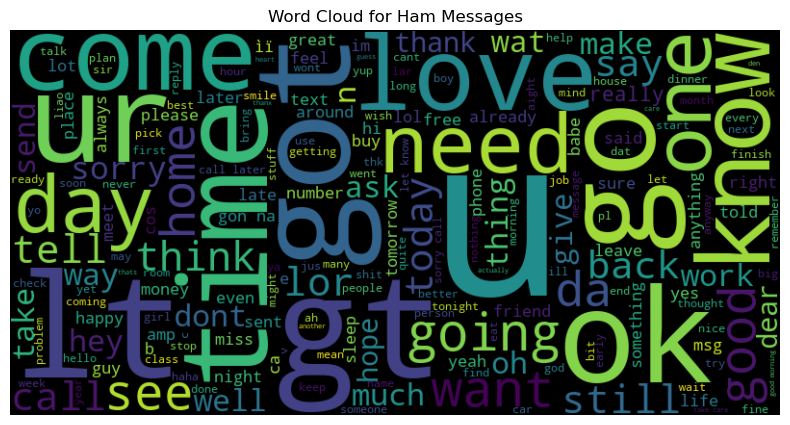

In [166]:
ham_messages = ' '.join(df[df['label'] == 'ham']['text'])

ham_tokens = process_messages(ham_messages)

ham_text = ' '.join(ham_tokens)

wordcloud = WordCloud(width = 800, height = 400).generate(ham_text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

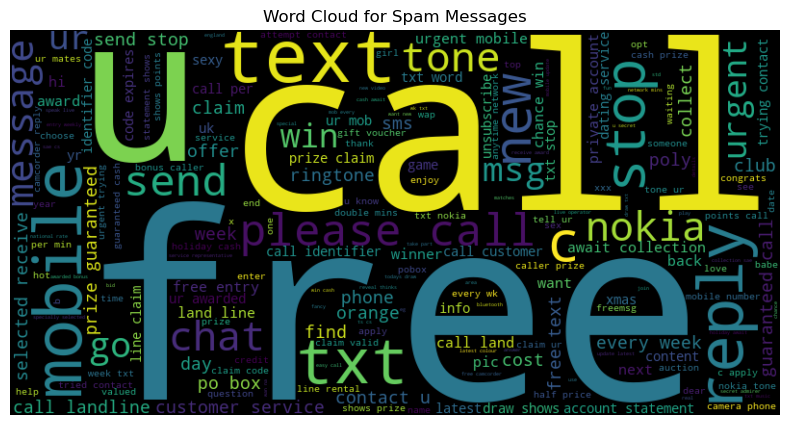

In [167]:
spam_messages = ' '.join(df[df['label'] == 'spam']['text'])

spam_tokens = process_messages(spam_messages)

spam_text = ' '.join(spam_tokens)

wordcloud = WordCloud(width = 800, height = 400).generate(spam_text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [168]:
## Bag of words model

In [169]:
def process_messages(messages):
    tokens = nltk.word_tokenize(messages)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [170]:
df['processed_message'] = df['text'].apply(process_messages)

In [171]:
vectorizer = CountVectorizer()
x = df['processed_message']
y = df['label']

In [172]:
xtransformed = vectorizer.fit_transform(x)
xtransformed

<5572x7138 sparse matrix of type '<class 'numpy.int64'>'
	with 42645 stored elements in Compressed Sparse Row format>

In [173]:
xtrain, xtest, ytrain, ytest = train_test_split(xtransformed, y, test_size = 0.2, random_state = 42)

In [174]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [175]:
ypreds_bow = logreg.predict(xtest)
ypreds_bow

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [176]:
f1_logreg_bow = f1_score(ytest, ypreds_bow, pos_label = 'spam')
print(f'Logsitic Regression F1 Score: {f1_logreg_bow.round(3) * 100}')

Logsitic Regression F1 Score: 90.5


In [177]:
## TF-IDF model

In [178]:
tfid_transformer = TfidfTransformer()
tfid_transformer

TfidfTransformer()

In [179]:
xtfid = tfid_transformer.fit_transform(xtransformed)

In [180]:
xtrain, xtest, ytrain, ytest = train_test_split(xtfid, y, test_size = 0.2, random_state = 42)

In [181]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [182]:
ypreds_tfidf = logreg.predict(xtest)
ypreds_tfidf

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [208]:
f1_logreg_tfidf = f1_score(ytest, ypreds_tfidf, pos_label = 'spam')
print(f'Logsitic Regression F1 Score: {f1_logreg_tfidf.round(3) * 100}')

Logsitic Regression F1 Score: 75.0


In [184]:
## Text Preprocessing 

In [185]:
import string

In [186]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [187]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [188]:
print("Processed DataFrame:")
print(df.head())

Processed DataFrame:
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, wkly, comp, win, fa, cup, final,...   
3      [u, dun, say, early, hor, u, c, already, say]   
4     [nah, think, goes, usf, lives, around, though]   

                                   processed_message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry wkly comp win fa cup final tkts may...   
3                u dun say early hor u c alre

In [196]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aaryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aaryan\AppData\Roaming\nltk_data...


True

In [193]:
from nltk.stem import WordNetLemmatizer
import re

In [197]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocesses the input text by removing numbers, HTML tags, URLs,
    punctuation, stopwords, and performing lemmatization.
    """
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize and lowercase
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

In [198]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [199]:
print("Processed DataFrame:")
print(df.head())

Processed DataFrame:
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, wkly, comp, win, fa, cup, final,...   
3      [u, dun, say, early, hor, u, c, already, say]   
4     [nah, think, goes, usf, lives, around, though]   

                                   processed_message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry wkly comp win fa cup final tkts may...   
3                u dun say early hor u c alre

In [200]:
x = df['processed_text']
y = df['label']

In [201]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer()

In [202]:
xtfidfvec = tfidf_vectorizer.fit_transform(x)

In [203]:
xtrain, xtest, ytrain, ytest = train_test_split(xtfidfvec, y, test_size = 0.2, random_state = 42)

In [204]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [205]:
ypreds_tfidfvec = logreg.predict(xtest)
ypreds_tfidfvec

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [207]:
f1_logreg_tfidfvec = f1_score(ytest, ypreds_tfidfvec, pos_label = 'spam')
print(f'Logsitic Regression F1 Score: {f1_logreg_tfidfvec.round(3) * 100}')

Logsitic Regression F1 Score: 77.3
